# Graded Challenge 4

# Introduction

Nama : Galih Sukmanaputra  

Batch : FTDS-005-HCK  

Dataset : Berasal dari ftds-hacktiv8-project ,dataset sesuai dengan nomor batch 005 phase1_ftds_005_hck. Kemudian di query dan di save menjadi h8dsft_P1G4_galih_s.csv.  
  
Objective : Project kali ini bertujuan membuat model clustering untuk melakukan Customer Segmentation dari data kartu kredit sebuah bank dibawah ini. Dengan menggunakan data informasi penggunaan kartu kredit selama 6 bulan terakhir. 

### Query  

In [1]:
# SELECT * 
# FROM `ftds-hacktiv8-project.phase1_ftds_005_hck.credit-card-information` 
# WHERE MOD(CUST_ID, 2) = 1;

Data diambil berdasarkan perintah soal batch 005

# Import Libraries

Dalam tahapan ini dilakukan import seluruh library yang dibutuhkan

In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import warnings
warnings.filterwarnings(action='ignore')

# Data Loading

Dalam tahapan ini data akan dicek dan dipahami polanya untuk pengolahan selanjutnya.

In [3]:
# Load Dataset

data = pd.read_csv("h8dsft_P1G4_galih_s.csv")
data.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125000,45.00,45.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,500.0,0.000000,NaN,0.000000,8
1,5069,0.000000,0.000000,176.03,176.03,0.00,0.0,0.125,0.125,0.00,0.0,0,1,7000.0,0.000000,NaN,0.000000,8
2,6075,757.964752,0.875000,157.40,157.40,0.00,0.0,0.125,0.125,0.00,0.0,0,6,1200.0,1494.480376,2638.598410,0.000000,8
3,6291,264.566591,0.375000,1150.00,1150.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1200.0,3029.380326,85.428885,0.000000,8
4,7755,440.613643,1.000000,600.00,600.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1000.0,215.316424,137.846006,0.000000,8
5,8299,611.561026,1.000000,765.00,765.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,2000.0,204.464151,146.352314,0.000000,8
6,8629,0.228572,0.125000,60.00,60.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1500.0,438.738982,NaN,0.000000,8
7,8805,105.333584,0.375000,306.00,306.00,0.00,0.0,0.125,0.125,0.00,0.0,0,2,6000.0,101.986927,118.324082,0.000000,8
8,7,16.379412,0.454545,178.15,0.00,178.15,0.0,0.250,0.000,0.25,0.0,0,3,5000.0,229.376368,89.613822,0.181818,12
9,91,559.151424,1.000000,94.00,94.00,0.00,0.0,0.250,0.250,0.00,0.0,0,3,5500.0,254.733329,218.279194,0.000000,12


In [4]:
data.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,6809,4438.521324,1.000000,591.84,109.16,482.68,564.365429,0.636364,0.181818,0.454545,0.272727,3,11,17000.0,5552.601399,1094.486286,0.00,11
4466,7211,1135.703750,1.000000,92.07,0.00,92.07,81.509491,0.272727,0.000000,0.181818,0.272727,3,3,1200.0,355.798199,434.689529,0.00,11
4467,8295,185.984965,0.454545,482.24,392.24,90.00,903.843591,0.272727,0.181818,0.090909,0.272727,8,8,1200.0,2333.997439,160.900585,0.25,11
4468,8855,3531.167073,0.900000,797.50,577.83,219.67,5273.226918,0.700000,0.400000,0.500000,0.900000,33,21,4000.0,2979.546700,3052.080103,0.00,10
4469,2389,1917.895730,1.000000,285.07,285.07,0.00,6084.858872,0.363636,0.363636,0.000000,1.090909,28,6,3000.0,5692.682993,556.449635,0.00,11
4470,2345,9629.808851,1.000000,0.00,0.00,0.00,4372.393835,0.000000,0.000000,0.000000,0.545455,9,0,12000.0,2468.988022,2134.295731,0.00,11
4471,6785,1040.030221,1.000000,0.00,0.00,0.00,1390.648290,0.000000,0.000000,0.000000,0.545455,18,0,1400.0,290.129620,287.994171,0.00,11
4472,7347,1322.818587,1.000000,0.00,0.00,0.00,762.301096,0.000000,0.000000,0.000000,0.545455,11,0,1500.0,1035.627320,312.835530,0.00,11
4473,8447,1060.391273,1.000000,0.00,0.00,0.00,1475.858013,0.000000,0.000000,0.000000,0.545455,10,0,2000.0,407.360560,277.084736,0.00,11
4474,1995,3447.674222,1.000000,205.00,205.00,0.00,4548.057776,0.090909,0.090909,0.000000,0.545455,7,1,10500.0,665.239171,817.844662,0.00,11


In [5]:
data[data.duplicated()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


Melakukan pengecekan terhadap data yang duplikat. Diperoleh hasil tidak terjadi duplikasi data.

In [6]:
# Duplikasi dataset
data_duplicate = data.copy()

Dilakukan duplikasi data untuk berjaga-jaga jika sewaktu-waktu dibutuhkan dataset asli.

Melihat jumlah missing value pada tiap kolom

In [7]:
# Check Dataset-1
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

In [8]:
data.isnull().sum() / data.shape[0] * 100

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.000000
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.463687
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

Terdapat missing value pada kolom dataset MINIMUM_PAYMENTS 3.4%

In [9]:
# drop mv columns of MINIMUM_PAYMENTS
data.dropna(axis=0, inplace=True)

In [10]:
len(data)

4320

MV sudah dihandle

In [11]:
num_col = data.describe().columns.tolist()
cat_col = data.select_dtypes(include=['object']).columns.tolist()

In [12]:
# numeric overview
data[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,4320.0,4476.103704,2588.710438,1.000000,2222.500000,4480.000000,6719.500000,8949.00000
BALANCE,4320.0,1602.334246,2083.982473,0.000000,144.637202,917.879527,2096.706479,18495.55855
BALANCE_FREQUENCY,4320.0,0.894835,0.208683,0.000000,0.909091,1.000000,1.000000,1.00000
PURCHASES,4320.0,1025.593544,2090.157063,0.000000,43.060000,373.605000,1139.400000,41050.40000
ONEOFF_PURCHASES,4320.0,609.028613,1678.680739,0.000000,0.000000,48.500000,594.272500,40624.06000
INSTALLMENTS_PURCHASES,4320.0,416.801903,893.364291,0.000000,0.000000,93.625000,469.897500,14686.10000
CASH_ADVANCE,4320.0,1001.363727,2083.361855,0.000000,0.000000,0.000000,1161.692888,47137.21176
PURCHASES_FREQUENCY,4320.0,0.496324,0.403019,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,4320.0,0.206370,0.300886,0.000000,0.000000,0.083333,0.333333,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,4320.0,0.367836,0.398013,0.000000,0.000000,0.166667,0.750000,1.00000


Menampilkan deskripsi data numerikal

In [13]:
# categorical overview
for i in cat_col:
    print(i)
    print()
    print(data[i].value_counts())
    print('-' * 10)

In [14]:
# categorical overview
for i in cat_col:
    print('Column: ',i)
    print('Total unique labels: ', data[i].nunique())
    print('-' * 30)

Tidak terdapat kolom kategorikal

In [15]:
X = data.copy()

Simpan data ke dalam variabel X

In [16]:
sample_clus = data.index.tolist()

simpan index data ke dalam variabel sample_clus

# Exploratory Data Analysis (EDA)

Dalam tahapan ini dilakukan eksplorasi data untuk mengetahui sebaran data dan visual data kedepannya agar perlakuan yang diterapkan sesuai. Selain itu, juga dilihat keterkaitan antar feature yang ada dengan label yang ingin diprediksi.

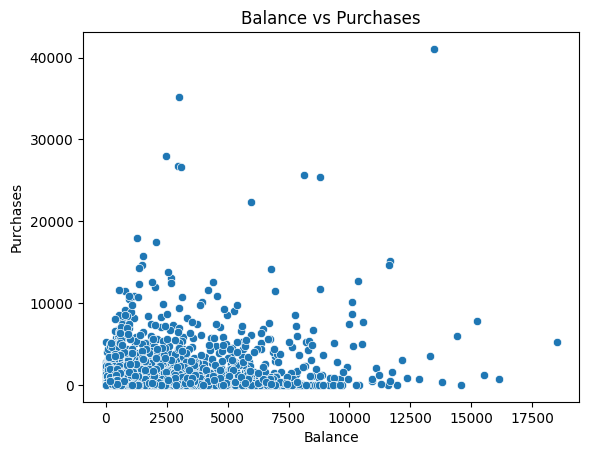

In [17]:
sns.scatterplot(data=data, x='BALANCE', y='PURCHASES')

plt.xlabel('Balance')
plt.ylabel('Purchases')
plt.title('Balance vs Purchases')
plt.show()

Menggambarkan tingkat pembelian dan saldo, terlihat pembelian bertumpuk di bawah angka 10000. 

In [18]:
data.PURCHASES_FREQUENCY.unique()

array([0.125   , 0.25    , 0.375   , 0.5     , 0.625   , 0.75    ,
       0.875   , 1.      , 0.090909, 0.181818, 0.363636, 0.142857,
       0.285714, 0.083333, 0.727273, 0.555556, 0.571429, 0.3     ,
       0.6     , 0.333333, 0.454545, 0.666667, 0.916667, 0.909091,
       0.7     , 0.166667, 0.714286, 0.636364, 0.777778, 0.1     ,
       0.2     , 0.4     , 0.8     , 0.583333, 0.833333, 0.428571,
       0.111111, 0.222222, 0.416667, 0.857143, 0.818182, 0.272727,
       0.888889, 0.9     , 0.545455, 0.      ])

In [19]:
!pip install phik

In [20]:
import phik

interval columns not set, guessing: ['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


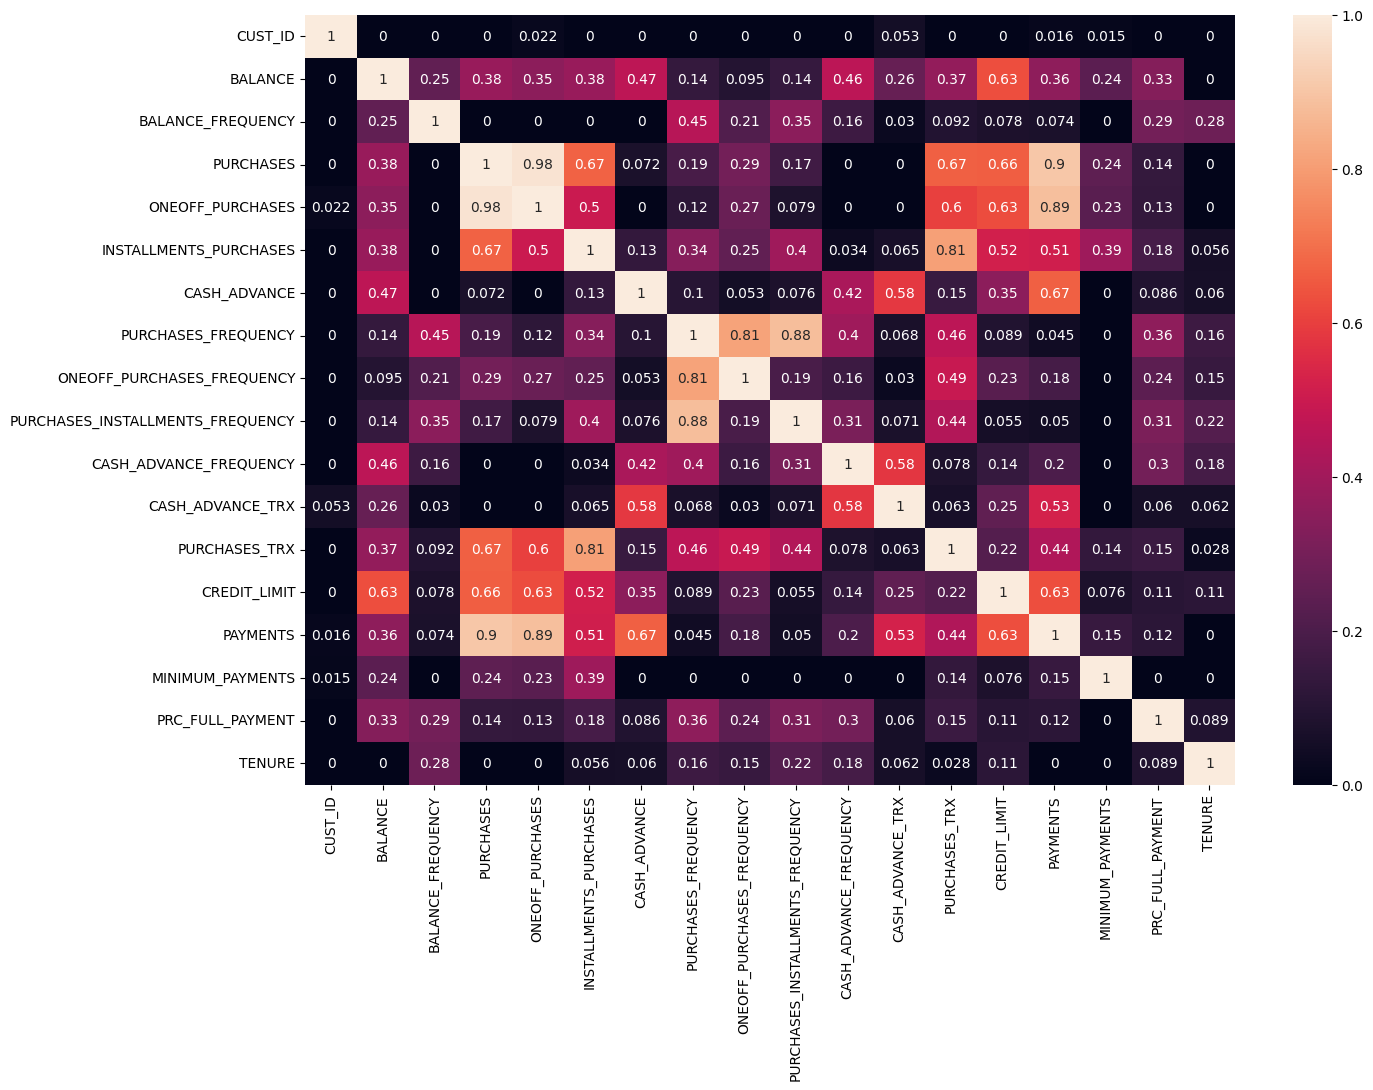

In [21]:
phik_corr = data.phik_matrix()
plt.figure(figsize=(15, 10))
sns.heatmap(phik_corr, annot= True,vmin=0, vmax=1)
plt.show()

Dari hasil visualisasi phik correlation terlihat bahwa kolom CUST_ID tidak berpengaruh cukup signifikan terhadap feature lainnya.

## Handling Outlier

In [22]:
for i in data.columns:
    print(i, ': ', data[i].skew())

CUST_ID :  -0.000909576000153484
BALANCE :  2.3060560083334405
BALANCE_FREQUENCY :  -2.085655942874467
PURCHASES :  6.982698043897626
ONEOFF_PURCHASES :  9.827307004944023
INSTALLMENTS_PURCHASES :  6.252820447484483
CASH_ADVANCE :  5.611537241356356
PURCHASES_FREQUENCY :  0.030477479947374164
ONEOFF_PURCHASES_FREQUENCY :  1.5142430379734177
PURCHASES_INSTALLMENTS_FREQUENCY :  0.4891007516065457
CASH_ADVANCE_FREQUENCY :  1.8028579475499225
CASH_ADVANCE_TRX :  6.352409253171002
PURCHASES_TRX :  4.694066710265747
CREDIT_LIMIT :  1.487940822693631
PAYMENTS :  5.720098998110234
MINIMUM_PAYMENTS :  14.669771084332641
PRC_FULL_PAYMENT :  1.9189016413560516
TENURE :  -3.026039686180468


Terlihat nilai skew yang tinggi pada beberapa kolom menandakan sebaran yang tidak normal

In [23]:
# check outlier
wins = Winsorizer(capping_method='iqr', fold=3, tail='both')
data_final = wins.fit_transform(data)

In [24]:
for i in data_final.columns:
    print(i, ': ', data_final[i].skew())

CUST_ID :  -0.000909576000153484
BALANCE :  1.7062061482361406
BALANCE_FREQUENCY :  -1.4450395257497899
PURCHASES :  1.7959135636739627
ONEOFF_PURCHASES :  1.7215606661552185
INSTALLMENTS_PURCHASES :  1.7566028027530942
CASH_ADVANCE :  1.6732632418054454
PURCHASES_FREQUENCY :  0.030477479947374164
ONEOFF_PURCHASES_FREQUENCY :  1.5142430379734177
PURCHASES_INSTALLMENTS_FREQUENCY :  0.4891007516065457
CASH_ADVANCE_FREQUENCY :  1.7380158566152835
CASH_ADVANCE_TRX :  1.7601314908745984
PURCHASES_TRX :  1.7921681908644465
CREDIT_LIMIT :  1.4092359733829902
PAYMENTS :  1.7139907834537695
MINIMUM_PAYMENTS :  1.7062663532497062
PRC_FULL_PAYMENT :  1.5863052016186194
TENURE :  0


Data sudah di capping menggunakan winsorizer dengan metode iqr dan fold 3, karena sebaran yang tidak normal. Selanjutnya akan ditinjau kembali.

In [25]:
data_final = data_final.drop(['CUST_ID','TENURE'], axis=1)

feature CUST_ID dan TENURE di drop karena dianggap tidak berpengaruh

In [26]:
data_final

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
2,757.964752,0.875000,157.4,157.4,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0.0,6.0,1200.0,1494.480376,2638.598410,0.0
3,264.566591,0.636364,1150.0,1150.0,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0.0,1.0,1200.0,3029.380326,85.428885,0.0
4,440.613643,1.000000,600.0,600.0,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0.0,1.0,1000.0,215.316424,137.846006,0.0
5,611.561026,1.000000,765.0,765.0,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0.0,1.0,2000.0,204.464151,146.352314,0.0
7,105.333584,0.636364,306.0,306.0,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0.0,2.0,6000.0,101.986927,118.324082,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,7952.914309,1.000000,0.0,0.0,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9.0,0.0,12000.0,2468.988022,2134.295731,0.0
4471,1040.030221,1.000000,0.0,0.0,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,16.0,0.0,1400.0,290.129620,287.994171,0.0
4472,1322.818587,1.000000,0.0,0.0,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11.0,0.0,1500.0,1035.627320,312.835530,0.0
4473,1060.391273,1.000000,0.0,0.0,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10.0,0.0,2000.0,407.360560,277.084736,0.0


In [27]:
sample_clus_1 = data_final.index.tolist()

In [28]:
X2 = data_final.copy()

Disimpan ke dalam variabel X2

## Scaling

In [29]:
num_col_2 = [
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT']

kolom setelah dropping

In [30]:
standard_scaler = StandardScaler()
df_clean1 = pd.DataFrame(standard_scaler.fit_transform(data_final), columns= num_col_2)
df_clean1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,-0.421185,-0.370952,-0.596411,-0.399387,-0.668106,-0.618703,-0.921465,-0.270465,-0.92429,-0.687774,-0.63501,-0.431112,-0.919474,-0.037445,2.698162,-0.572178
1,-0.680180,-2.164107,0.243044,1.001838,-0.668106,-0.618703,-0.921465,-0.270465,-0.92429,-0.687774,-0.63501,-0.714704,-0.919474,0.875289,-0.761122,-0.572178
2,-0.587769,0.568321,-0.222098,0.225419,-0.668106,-0.618703,-0.921465,-0.270465,-0.92429,-0.687774,-0.63501,-0.714704,-0.974939,-0.798105,-0.690103,-0.572178
3,-0.498035,0.568321,-0.082556,0.458345,-0.668106,-0.618703,-0.921465,-0.270465,-0.92429,-0.687774,-0.63501,-0.714704,-0.697616,-0.804559,-0.678577,-0.572178
4,-0.763765,-2.164107,-0.470738,-0.189612,-0.668106,-0.618703,-0.921465,-0.270465,-0.92429,-0.687774,-0.63501,-0.657985,0.411674,-0.865497,-0.716553,-0.572178


Scaling menggunakan standardscaler karena sebaran data sudah cukup normal

## VIF  
### Multicollinearity test

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [32]:
calc_vif(df_clean1[num_col_2])

,variables,VIF
0,BALANCE,4.861902
1,BALANCE_FREQUENCY,1.321180
2,PURCHASES,20.373661
3,ONEOFF_PURCHASES,12.558932
4,INSTALLMENTS_PURCHASES,7.211109
5,CASH_ADVANCE,3.475535
6,PURCHASES_FREQUENCY,11.103193
7,ONEOFF_PURCHASES_FREQUENCY,5.879790
8,PURCHASES_INSTALLMENTS_FREQUENCY,11.920226
9,CASH_ADVANCE_FREQUENCY,6.446869


Dari tinjauan nilai vif terlihat feature PURCHASES, ONEOFF_PURCHASES, PHURCHASE_FREQUENCY, PHURCHASE_INSTALLMENTSFREQUENCY memiliki skor yang tinggi.  Namun hal ini akan ditinjau kembali dengan model K-means clustering yang secara teori sebenarnya tidak memperhitungkan vif sebagai preferensi pembuatan model.

## PCA

In [33]:
# PCA
pca = PCA(n_components= 0.95)
pca.fit(df_clean1)

cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum
# check elbow with visualization

array([0.32069463, 0.57284175, 0.66729346, 0.74464311, 0.80656413,
       0.85242656, 0.88804773, 0.9182067 , 0.94201953, 0.9567944 ])

In [34]:
d = np.argmax(cumsum >= 0.95) + 1
d

10

In [35]:
cumsum

array([0.32069463, 0.57284175, 0.66729346, 0.74464311, 0.80656413,
       0.85242656, 0.88804773, 0.9182067 , 0.94201953, 0.9567944 ])

Menentukan jumlah minimum komponen utama yang diperlukan dalam PCA agar dapat menjelaskan setidaknya 95% varians dalam data.

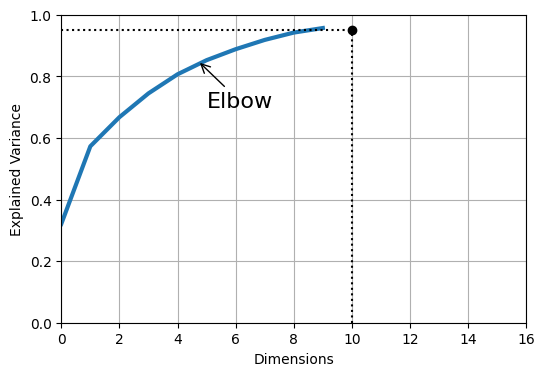

In [36]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 16, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(4.7, 0.85), xytext=(5, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

Visualisasi elbow pca

In [37]:
np.sum(pca.explained_variance_ratio_)

0.9567943982324445

In [38]:
data_pca = pd.DataFrame(pca.fit_transform(df_clean1))
data_pca

,0,1,2,3,4,5,6,7,8,9
0,-1.415187,-0.209284,-0.050792,-1.639598,-1.000011,-0.747025,-0.925284,-1.879954,0.213440,0.137076
1,-0.812821,-1.406658,2.188516,0.170959,-0.605349,-1.954889,-0.474937,-0.169072,0.435280,0.620202
2,-1.298369,-1.463275,0.629248,-1.283705,0.621397,-0.145996,-0.662197,0.369459,-0.347439,-0.050646
3,-1.128857,-1.316777,0.788604,-1.336601,0.490762,-0.076451,-0.568064,0.466681,-0.454950,0.068415
4,-1.602483,-1.740411,1.447601,-0.011486,-1.155141,-0.887820,1.100017,0.226250,-0.216519,0.010857
...,...,...,...,...,...,...,...,...,...,...
4315,-2.350478,5.264646,-0.282901,-0.181032,-1.504319,1.120463,0.439159,-0.121553,-0.161761,-0.375484
4316,-3.012280,1.470063,-0.245134,0.829628,2.264819,-0.231077,0.086995,0.357351,-1.165481,0.583225
4317,-2.717065,1.058626,-0.104109,0.442435,1.734411,-0.211256,-0.309211,0.427168,-0.868253,0.658873
4318,-2.804627,1.036856,-0.128800,0.487438,1.736278,-0.103970,-0.058023,0.511120,-0.902304,0.302341


<AxesSubplot:xlabel='0', ylabel='1'>

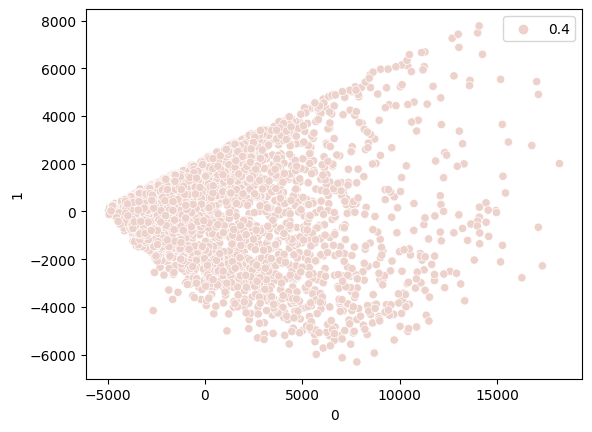

In [39]:
# for visualization, only 2 PC's saved
pca_viz = PCA(n_components=2)
X_viz = pd.DataFrame(pca_viz.fit_transform(X2))
sns.scatterplot(x=X_viz[0], y=X_viz[1],hue=0.4)

## Pipeline Preprocess

In [40]:
pipe = Pipeline([
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=3)),
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components= 0.95))
    ])

In [41]:
X2.shape

(4320, 16)

In [42]:
X2_tr = pipe.fit_transform(X2)
X2_tr

array([[-1.4151866 , -0.20928449, -0.05079197, ..., -1.87995368,
         0.21344034,  0.13707632],
       [-0.81282146, -1.40665841,  2.18851571, ..., -0.16907161,
         0.43528041,  0.62020204],
       [-1.29836879, -1.46327493,  0.62924759, ...,  0.36945885,
        -0.34743881, -0.05064638],
       ...,
       [-2.71706478,  1.05862552, -0.10410921, ...,  0.42716847,
        -0.86825256,  0.65887279],
       [-2.80462683,  1.03685639, -0.12880028, ...,  0.51111952,
        -0.90230394,  0.30234142],
       [-2.2559115 ,  3.15760905,  0.26158851, ...,  0.93113675,
        -0.37405258, -0.71619763]])

## Model Definition With K-means

In [43]:
min_inertia = np.infty

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X2_tr)
    inertia = kmeans.inertia_
    if inertia < min_inertia:
        min_inertia = inertia
        best_k = k

best_kmeans = KMeans(n_clusters=best_k, random_state=42).fit(X2_tr)
best_labels = best_kmeans.labels_

print('Best - n_clusters: ', best_k)
print('Best - inertia   : ', min_inertia)


Best - n_clusters:  8
Best - inertia   :  25911.923449772345


Dari hasil looping diperoleh kluster terbaik sebanyak 8

In [44]:
models = [KMeans(n_clusters=k) for k in range(2, 6)]
inertias = [model.fit(X2_tr).inertia_ for model in models]

for k, inertia in zip(range(2, 6), inertias):
    print(k, ': ', inertia)


2 :  50893.42556388888
3 :  40346.278493517806
4 :  34925.77615659853
5 :  31632.627384145402


Kluster direduksi dan diperoleh sebanyak 5

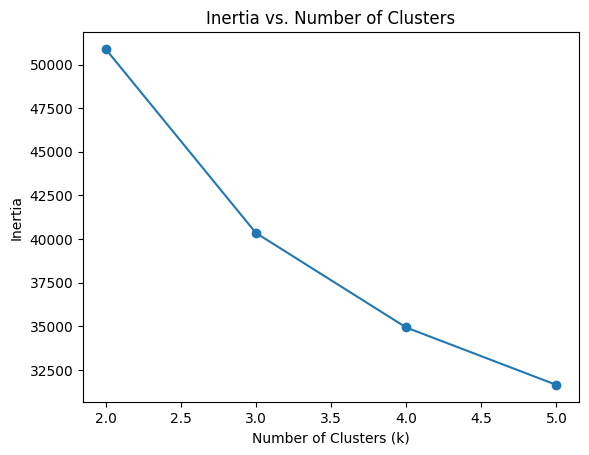

In [45]:
# Plotting the inertia values
plt.plot(range(2, 6), inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')
plt.show()

### Silhouette

In [46]:
# List of number of clusters to evaluate
num_clusters = range(2, 6)  # K is the maximum number of clusters

# Initialize variables to store the best cluster and its silhouette score
best_cluster = None
best_score = -1

# Iterate over the number of clusters
for k in num_clusters:
    # Perform clustering
    kmeans_sil = KMeans(n_clusters=k)
    labels_ = kmeans.fit_predict(X2_tr)
    
    # Calculate the silhouette score
    score = silhouette_score(X2_tr, labels_)
    
    # Check if the current score is better than the best score
    if score > best_score:
        best_score = score
        best_cluster = k

# Print the best number of clusters and its silhouette score
print("Best number of clusters:", best_cluster)
print("Silhouette score:", best_score)

Best number of clusters: 2
Silhouette score: 0.2264419463334682


Diperoleh hasil kluster berdaarkan silhouette method sebanyak 2 kluster

### Visualization Based elbow method K = 4

In [47]:
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X2_tr)
labels

array([3, 3, 3, ..., 3, 3, 2], dtype=int32)

<AxesSubplot:xlabel='0', ylabel='1'>

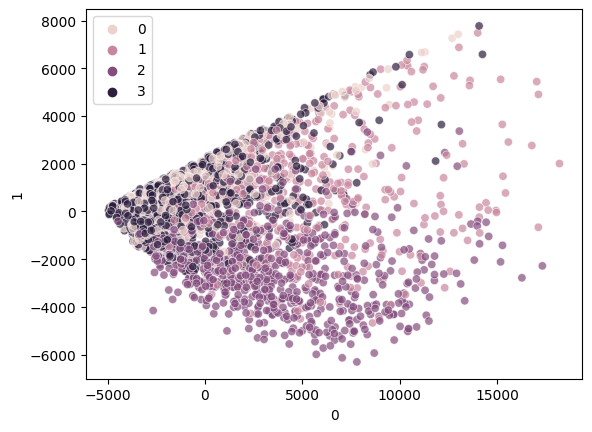

In [48]:
# visualize segmentation of 4 cluster in 2 PC's
sns.scatterplot(x=X_viz[0], y=X_viz[1], hue=labels, alpha=.7)

Berikut hasil visualisasi 4 kluster, namun menurut personal judgement 4 kluster dirasa masih terlalu banyak sehingga direduksi kembali

### Visualization Based Silhouette Method K = 2

<AxesSubplot:xlabel='0', ylabel='1'>

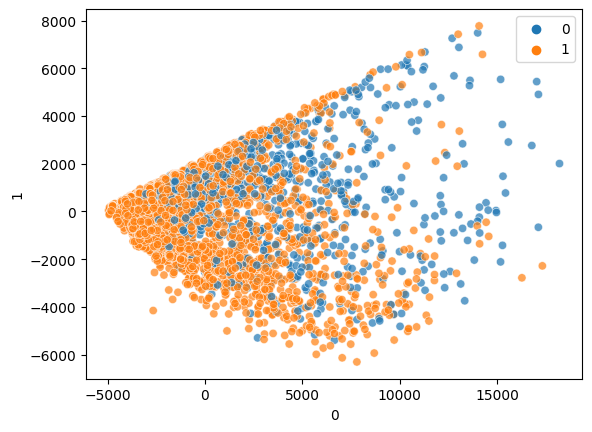

In [49]:
k_2 = KMeans(n_clusters=2, random_state=42)
label2 = k_2.fit_predict(X2_tr)

sns.scatterplot(x=X_viz[0], y=X_viz[1], hue=label2, alpha=.7)

Berikut hasil visualisasi 2 kluster.

### Last Decision

<AxesSubplot:xlabel='0', ylabel='1'>

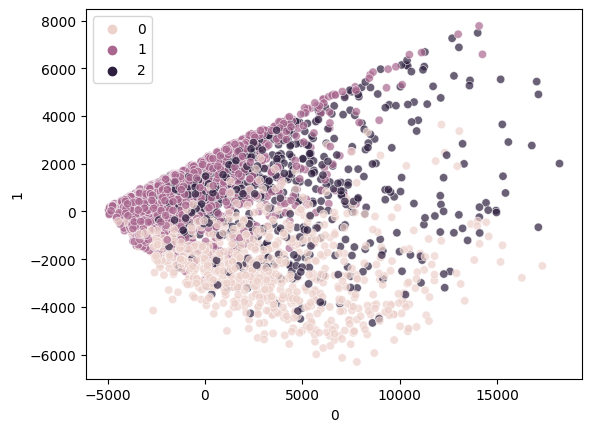

In [50]:
k_3 = KMeans(n_clusters=3, random_state=42)
label3 = k_3.fit_predict(X2_tr)

sns.scatterplot(x=X_viz[0], y=X_viz[1], hue=label3, alpha=.7)

Berdasarkan pertimbangan, diputuskan untuk mengambil 3 cluster. Karena berdasarkan hasil uji coba, jumlah kluster 3 lebih bisa mendeskripsikan karakter tiap customer yang ada dalam dataset.

In [51]:
# Clustering
data_clus = data.loc[sample_clus_1].copy()
data_clus

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2,6075,757.964752,0.875,157.4,157.4,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,6291,264.566591,0.375,1150.0,1150.0,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8
4,7755,440.613643,1.000,600.0,600.0,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8
5,8299,611.561026,1.000,765.0,765.0,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,2000.0,204.464151,146.352314,0.0,8
7,8805,105.333584,0.375,306.0,306.0,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,2,6000.0,101.986927,118.324082,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,2345,9629.808851,1.000,0.0,0.0,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
4471,6785,1040.030221,1.000,0.0,0.0,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
4472,7347,1322.818587,1.000,0.0,0.0,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4473,8447,1060.391273,1.000,0.0,0.0,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11


In [52]:
data_clus['cluster'] = label3
data_clus

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
2,6075,757.964752,0.875,157.4,157.4,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8,1
3,6291,264.566591,0.375,1150.0,1150.0,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8,1
4,7755,440.613643,1.000,600.0,600.0,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8,1
5,8299,611.561026,1.000,765.0,765.0,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,2000.0,204.464151,146.352314,0.0,8,1
7,8805,105.333584,0.375,306.0,306.0,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,2,6000.0,101.986927,118.324082,0.0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,2345,9629.808851,1.000,0.0,0.0,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11,0
4471,6785,1040.030221,1.000,0.0,0.0,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11,0
4472,7347,1322.818587,1.000,0.0,0.0,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11,0
4473,8447,1060.391273,1.000,0.0,0.0,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11,0


In [53]:
data_clus.groupby('cluster').mean()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,,
0,4384.296629,3771.227577,0.956431,298.865348,187.564899,111.339461,3484.614879,0.220044,0.098101,0.137457,0.419304,11.516854,4.758427,6320.417092,2668.541603,1629.678495,0.025610,11.453933
1,4515.184251,723.948176,0.848578,425.635646,204.993031,220.791315,279.901812,0.456952,0.122786,0.337880,0.063840,1.058486,7.883410,3185.057590,838.141153,476.924732,0.163338,11.459480
2,4450.886978,2053.861146,0.976146,3748.293735,2368.315823,1380.715012,604.865991,0.924932,0.593363,0.715998,0.073919,1.918919,50.471744,6840.356265,3852.154575,1323.747700,0.272930,11.878378


## Model Saving

Dalam tahap ini dilakukan penyimpanan model dan file lain terkait dengan hasil pembuatan model

In [54]:
# Save the Files

import pickle, joblib
import json

with open('model.pkl', 'wb') as file_1:
  pickle.dump(k_3, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  pickle.dump(standard_scaler, file_2)

with open('list_num_cols.txt', 'w') as file_3:
  json.dump(num_col, file_3)

with open('list_cat_cols.txt','w') as file_4: 
  json.dump(cat_col, file_4)

with open('pipeline.pkl', 'wb') as file_7:
    pickle.dump(pipe, file_7)





In [55]:
# data.tail(5).to_csv('data_inferences.csv')

## Conclusion

Cluster 0 : Merepresentasikan nasabah dengan balance tinggi dan pembelian yang sedang.  
Cluster 1 : Merepresentasikan nasabah dengan balance rendah dan pembelian yang rendah.  
Cluster 2 : Merepresentasikan nasabah dengan balance tinggi, aktivitas pembelian tinggi, dan batas level kredit yang tinggi.

## Conceptual Problems

Jawab pertanyaan berikut:

1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?  

Jawab :  

Inertia pada algoritma K-Means merupakan suatu metrik evaluasi yang mengukur sejauh mana data poin dalam suatu cluster berada dari pusat clusternya. Secara spesifik, inertia adalah jumlah total kuadrat jarak antara setiap data poin dengan pusat cluster terdekatnya. Dengan kata lain, inertia menggambarkan seberapa dekatnya data poin dalam suatu cluster.



2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !  

Jawab :  

Elbow Method adalah metode yang digunakan untuk membantu menentukan jumlah optimal dari cluster yang akan digunakan dalam algoritma K-Means. Tujuannya untuk mencari titik "elbow" pada grafik inertia versus jumlah cluster yang dibentuk. Pada titik elbow, penurunan inertia mulai menurun secara signifikan saat jumlah cluster ditambah, dan penambahan cluster lebih lanjut memberikan manfaat yang kurang signifikan.

Langkah-langkah penggunaan Elbow Method:

- Terapkan algoritma K-Means dengan berbagai jumlah cluster (k) pada dataset Anda.
- Hitung inertia untuk setiap k dan simpan dalam suatu list atau array.
- Plot grafik inertia dan jumlah cluster.
- Cari titik elbow pada grafik tersebut. Ini dapat dilakukan dengan visualisasi dan interpretasi, mencari titik di mana penurunan inertia mulai melambat dan menjadi kurang signifikan.

Kelebihan dari Elbow Method:

- Memberikan gambaran awal untuk memilih jumlah cluster yang optimal dalam K-Means.
- Relatif sederhana dan mudah digunakan.
- Memberikan visualisasi yang intuitif untuk memahami perubahan inertia saat jumlah cluster berubah.

Kelemahan dari Elbow Method:

- Tidak selalu memberikan jawaban yang jelas tentang jumlah cluster yang tepat.
- Interpretasi grafik dapat subjektif, tergantung pada pengamatan pengguna.
- Hasil yang diperoleh dapat dipengaruhi oleh karakteristik dan kompleksitas tiap feature pada data.